<a href="https://colab.research.google.com/github/sskamalapurkar/Unsupervised_ML_Clustering/blob/main/Online_Retail_Customer_Segmentation_Sayali_Kamalapurkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---



In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**In this project, we are required to :**


*   Understand the Dataset & cleanup (if required)

*   Build a clustering model to segment the customer-based similarity

*   Also fine-tune the hyperparameters & compare the evaluation metrics of various clustering algorithms

# **Introduction**

---



In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
from numpy import math
import datetime as dt

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Clustering Algorithms
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing dataset
file_path = '/content/drive/MyDrive/Unsupervised ML - Clustering/Online Retail.xlsx'
DataFrame = pd.read_excel(file_path)
df = DataFrame.copy()

In [ ]:
# let us have a glance at the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Data Description**

---

**Attribute Information**

|Field Name|Description|
|---|---|
|**InvoiceNo:**|Invoice number. A 6-digit integer number uniquely assigned to each transaction.
||If this code starts with letter 'c', it indicates a cancellation.|
|**StockCode:**|Product (item) code. A 5-digit integer number uniquely assigned to each distinct product.|
|**Description:**|Product (item) name|
|**Quantity:**|The quantities of each product (item) per transaction.|
|**InvoiceDate:**|Invice Date and time. The day and time when each transaction was generated.|
|**UnitPrice:**|Unit price. Product price per unit in sterling.|
|**CustomerID:**|Customer number. A 5-digit integral number uniquely assigned to each customer.|
|**Country:**|Country name. The name of the country where each customer resides.|

In [ ]:
#Checking number of rows and columns
df.shape

(541909, 8)

In [ ]:
print("Total retail transactions including each product in every transactions (Rows): ", df.shape[0])
print("Number of features (Columns): ", df.shape[1])

Total retail transactions including each product in every transactions (Rows):  541909
Number of features (Columns):  8


In [ ]:
# printing names of all the columns / features
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# getting info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**There are 4 features whose datatype is object, 2 features whose datatype is float64, 1 feature whose datatype is datetime64 and 1 feature whose datatype is int64.**

**Memory usage by the dataset is 33.1 MB.**

# **Data Wrangling**

---



In [ ]:
#checking for unique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64



*   **For 4070 products, there are 25900 transactions in the data. This means that each product is likely to have multiple transactions in the data. There are almost as many products as customers in the data as well.**

*   **In the dataset, we have retail transactions from almost 38 different countries of the world.**

*   **Almost 25900 overall transactions, this includes cancelled transactions too.**

*   **Also, 4223 different items are listed in the dataset.**

*   **Overall customer count in the available dataset is 4372.**

In [ ]:
#let us check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Only 2 columns have null values in it.**

**Duplicate Values**

---

Why is it important to remove duplicate records from my data?

> "Duplication" means that we have repeated data in our dataset. This could be due to things like data entry errors or data collection methods. By removing duplicate values in our data set, time and money are saved by not sending identical communications multiple times to the same person.

In [ ]:
# checking for duplicate Values in the dataset
duplicates=len(df[df.duplicated()])
print("The number of duplicate values in the dataset is - ",duplicates)

The number of duplicate values in the dataset is -  5268


In [ ]:
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
# Select transactions with InvoiceNo = '536409' & StockCode = '21866'
df.loc[(df['InvoiceNo'].astype(str) == '536409') & (df['StockCode'].astype(str) == '21866')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


As we can see, the duplicates are nothing but repeat entry of the particular transactions. These entries are exactly same, means there is no significance of such entries while analyzing the data. Hence we will drop all those duplicate rows from the data.

In [ ]:
# Remove duplicates
df = df.drop(index=df[df.duplicated()].index)
print("Number of rows after removal of duplicates : {}".format(df.shape[0]))

Number of rows after removal of duplicates : 536641


In [ ]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641.0,536641,535187,536641.000000,536641,536641.000000,401604.000000,536641
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2301,2357,NaN,1114,NaN,NaN,490300
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15281.160818,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN


**Observations:**



*   There are 4070 unique product codes. **'85123A'** is the most common product code appeared 2301 times.

*   Majority of customers resides in United Kingdom.

In [ ]:
# Inspect min and max Quantity transactions
df.loc[(df['Quantity']==-80995) | (df['Quantity']==80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


**Invoice No. 581483 of 80995 quantity sell of stock code 23843 is reversed by adding a contra entry. Invoice No. of such reversal/cancelled entries starts with letter 'C'**

In [ ]:
# Cancelled/Reversed invoices
print("Cancelled invoices/transactions : {}".format(df[df['InvoiceNo'].astype(str).str[0] == 'C'].shape[0]))

Cancelled invoices/transactions : 9251


In [ ]:
df = df[df['InvoiceNo'].astype(str).str[0] != 'C']
df.shape

(527390, 8)

In [ ]:
# Display transactions with negative unit price.
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


**Above transactions are looking to be a manual ledger adjustments. Also they don't have customer id.**

In [ ]:
# Dsiplay transaction with unit price > 10000
df[df['UnitPrice'] > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


**Most of the higher unit price transactions are related to Amazon fee for selling the product through their platform. Such transactions don't have customer id.**

In [ ]:
print("Transactions with zero unit price : {}".format(df[df['UnitPrice'] == 0].shape[0]))

Transactions with zero unit price : 2510


In [ ]:
#First five transactions with zero unit price
df[df['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


We can see that such odd transactions do not have any customer ID. So it won't be useful to keep them in the data. It is advisable to drop all such rows which do not have customer ID.

In [ ]:
#Remove transactions with missing customer ids
df = df.drop(index=df[df['CustomerID'].isnull()].index)
print("Retail transactions after removing missing customer ids  : {}".format(df.shape[0]))

Retail transactions after removing missing customer ids  : 392732


**Outlier Detection and Treatment**

---



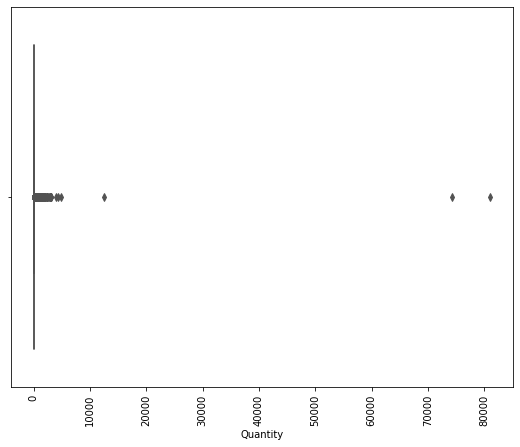

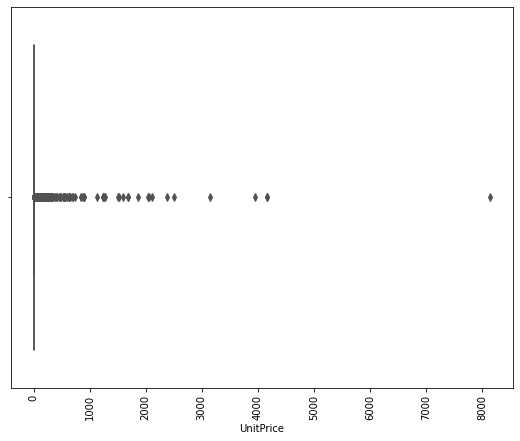

In [ ]:
#creating function for visualizing outliers by boxplot
def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.boxplot(df[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)
     

In [ ]:
# Creating a function to remove outliers
def remove_outliers(data , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = data[column].quantile(0.75)
  q1 = data[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    data = data[data[column] <= upper_limit]
  else:
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]   
  
  return data

In [ ]:
# Removing the outliers using the function created
df = remove_outliers(data = df, column = 'Quantity')
df = remove_outliers(data = df, column = 'UnitPrice')
     

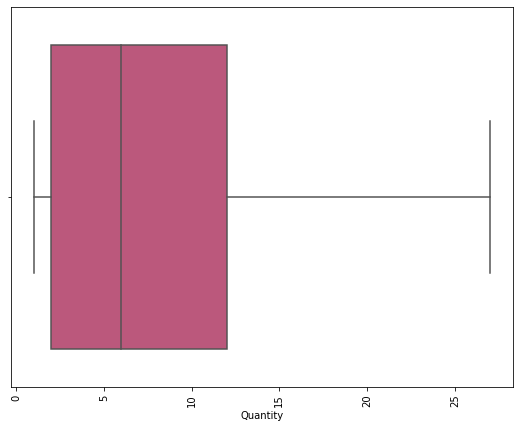

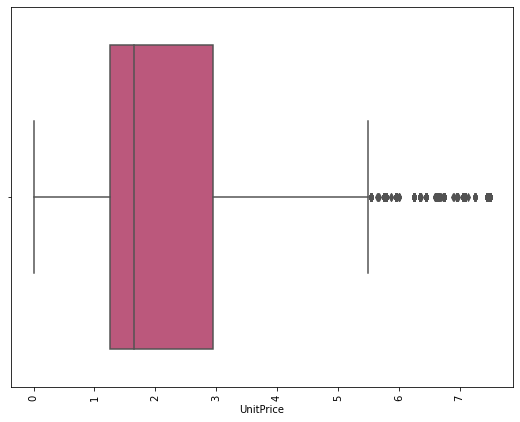

In [ ]:
# checking again with boxplot
toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)
     

We have removed all outliers from Quantity and Unit Price columns. Observations from boxplot:

* **Median of Quantity is 6 and most of the quantities lie between 2 to 12.**

* **50th percentile for unit price is approx 1.75, and most of the unit prices are between 1.25 to 3.**

# **Feature Engineering**

---

We are going to extract more information from the available columns before proceeding to EDA. In the given data, we have very few columns, that is features, hence we will try to create new columns based on available information so as to get more meaningful features for analysing customer behaviour.

In [ ]:
#InvoiceDate column has date and time, which we will separate as month, day and hour respectively
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.month
df['day_name'] = df['InvoiceDate'].dt.day_name()
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
#creating a function to categorise hours in three slots
def day_time(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
#creating new column which provides hour slots into three categories
df['day_time']=df['Hour'].apply(day_time)

In [ ]:
# From quantity and unit price, we can calculate total sales amount for that perticular transaction
df['Sales_Amount'] = df['Quantity'] * df['UnitPrice']

**Customer ID is 5 digit integer number, but in our data column contains float values. So, we will be converting Customer ID from float to int.**

In [ ]:
# Customer ID - float to int conversion
df['CustomerID'] = df['CustomerID'].apply(int)

In [ ]:
# Check the dataset again
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_name,Day,Hour,day_time,Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,Wednesday,1,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,Wednesday,1,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34


**Now we will do EDA. Some of the following questions will try to answer through EDA.**



1.   Which products are the most and least sold ones?
2.   Which are the most revenue generating products?

3.   Which day had the most and least number of purchases?
4.   On which days most of the revenue generates?

5.   Which month had the most and least number of purchases?
6.   In terms of revenue generation, which month is most important?

7.   Which hour in a day had the most and least number of purchases?
8.   In which time of the day highest revenue is generated?

9.   Which countries has the most number of customers?
10.  Which are the most spending customers?
11.  Distribution of the numerical features.

# **EDA on features**

---



1. **Which products are the most and least sold ones?**

WHITE HANGING HEART T-LIGHT HOLDER    1668
JUMBO BAG RED RETROSPOT               1327
PARTY BUNTING                         1268
LUNCH BAG RED RETROSPOT               1195
ASSORTED COLOUR BIRD ORNAMENT         1146
Name: Description, dtype: int64


Text(0, 0.5, 'product Name')

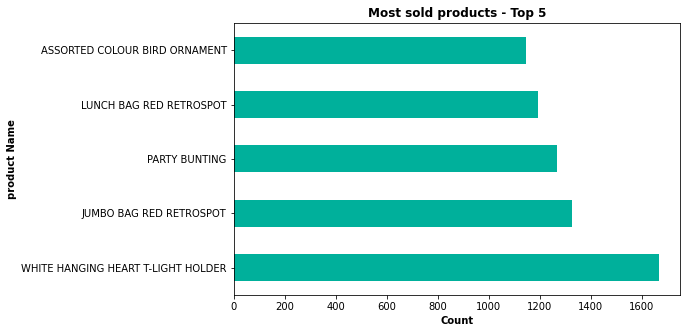

In [ ]:
product_df_top = df['Description'].value_counts()[:5]
print(product_df_top)
product_df_top.plot.barh(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.title("Most sold products - Top 5", weight ='bold')
plt.xlabel("Count", weight='bold')
plt.ylabel('product Name', weight='bold')

In [ ]:
product_df_bottom = df['Description'].value_counts()[-5: ]
print(product_df_bottom)

M/COLOUR POM-POM CURTAIN               1
BLUE/GREEN SHELL NECKLACE W PENDANT    1
 I LOVE LONDON MINI RUCKSACK           1
SET 36 COLOURING PENCILS DOILEY        1
RECYCLED ACAPULCO MAT RED              1
Name: Description, dtype: int64


2. **Which are the most revenue generating products?**

Description
PARTY BUNTING                         34952.85
WHITE HANGING HEART T-LIGHT HOLDER    31763.76
JUMBO BAG RED RETROSPOT               24923.50
SPOTTY BUNTING                        23513.05
ASSORTED COLOUR BIRD ORNAMENT         22940.06
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'product Name')

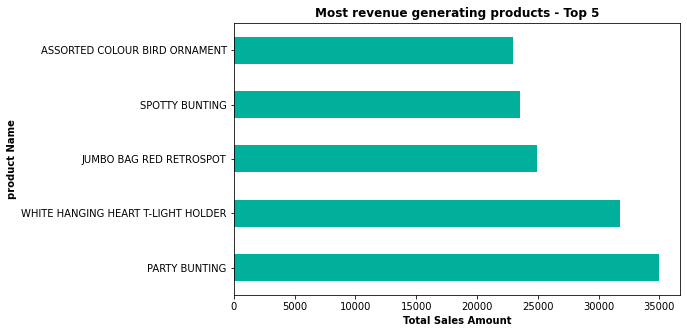

In [ ]:
most_revenue_product_df = df.groupby('Description')['Sales_Amount'].sum().sort_values(ascending=False).head(5)
print(most_revenue_product_df)
most_revenue_product_df.plot.barh(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.title("Most revenue generating products - Top 5", weight ='bold')
plt.xlabel("Total Sales Amount", weight='bold')
plt.ylabel('product Name', weight='bold')

* Most sold product is - **WHITE HANGING HEART T-LIGHT HOLDER**

* Most revenue generating product is - **PARTY BUNTING**

* **PARTY BUNTING** is the third highest selling product with highest revenue generator

* **WHITE HANGING HEART T-LIGHT HOLDER** is the top selling product with second highest revenue generator

3. **Which day had the most and least number of purchases?**

Thursday     66124
Wednesday    56838
Tuesday      55374
Monday       54609
Sunday       54452
Friday       45868
Name: day_name, dtype: int64


Text(0, 0.5, 'Count')

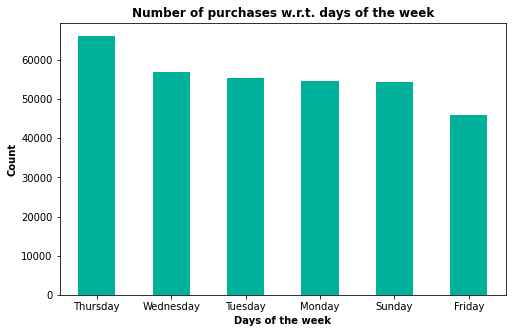

In [ ]:
days_df_top = df['day_name'].value_counts()
print(days_df_top)
days_df_top.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Number of purchases w.r.t. days of the week", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Count', weight='bold')

4. **On which days most of the revenue generates?**

day_name
Thursday     927269.410
Wednesday    771937.560
Tuesday      744324.301
Monday       702198.861
Friday       647459.811
Sunday       506286.241
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

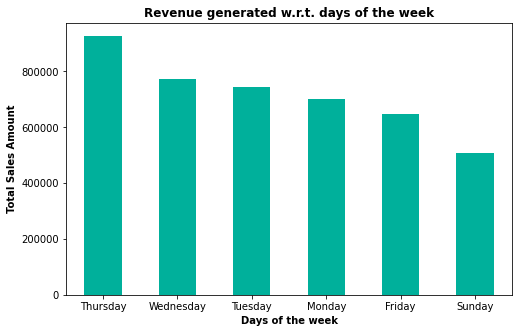

In [ ]:
days_revenue_df = df.groupby('day_name')['Sales_Amount'].sum().sort_values(ascending=False)
print(days_revenue_df)
days_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. days of the week", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

* **Thursday is the day on which highest number of purchases are done which resulted in highest revenue generation compared to other days of the week.**

* **One point to be noted that, Friday was the day on which lowest number of purchases are done, but still in terms of revenue generation Friday is second lowest day of the week. This means that on Friday, products sold were having higher unit price than Sunday.**

5. **Which month had the most and least number of purchases?**

11    55217
10    42151
12    36468
9     33973
5     23151
8     22482
3     22448
7     22397
6     22317
4     18824
1     17457
2     16380
Name: Month, dtype: int64


Text(0, 0.5, 'Count')

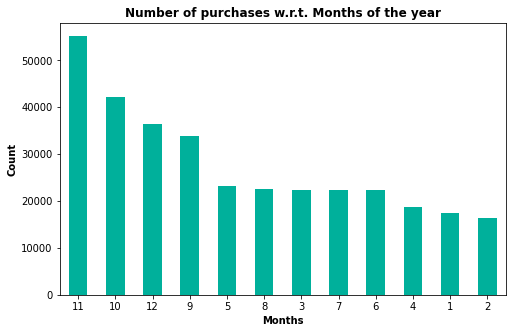

In [ ]:
months_df_top = df['Month'].value_counts()
print(months_df_top)
months_df_top.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Number of purchases w.r.t. Months of the year", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Count', weight='bold')

* **September to December are the months in which highest number of purchases are happening.**

6. **In terms of revenue generation, which month is most important?**

Month
11    642984.880
10    524843.470
9     480898.852
12    461547.900
5     324899.440
8     305233.840
6     290158.850
7     289068.991
3     285458.420
4     242420.681
1     232767.980
2     219192.880
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

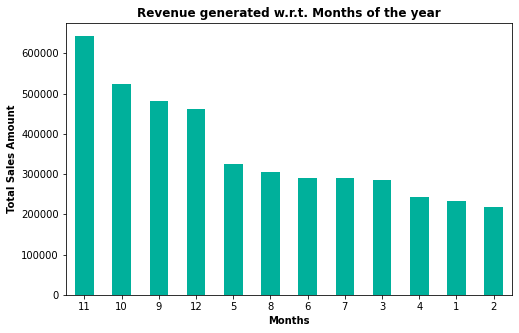

In [ ]:
months_revenue_df = df.groupby('Month')['Sales_Amount'].sum().sort_values(ascending=False)
print(months_revenue_df)
months_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. Months of the year", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

* **Same pattern we can see in revenue generation w.r.t. months. September to December, higher number of purchases results in higher revenue.**

7. **Which hour in a day had the most and least number of purchases?**

    Hours  Count
0      12  61044
1      13  54497
2      14  46050
3      11  40956
4      15  38303
5      10  30233
6      16  20500
7       9  17550
8      17  11104
9       8   6964
10     19   2801
11     18   2387
12     20    697
13      7    178
14      6      1


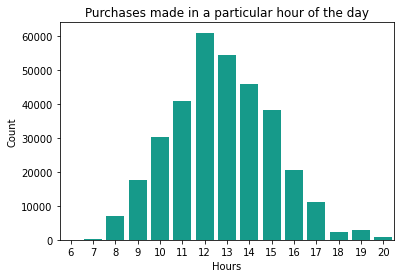

In [ ]:
hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
print(hour_df)

# plot the number of purchases w.r.t hour of the day
sns.barplot(x='Hours', y='Count', data=hour_df, color = '#00b09b')
plt.title('Purchases made in a particular hour of the day')
plt.show()

* **Most of the purchases are happening between 10 AM to 3 PM.**


8. **In which time of the day highest revenue is generated?**

day_time
Afternoon    2741395.942
Morning      1496779.922
Evening        61300.320
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

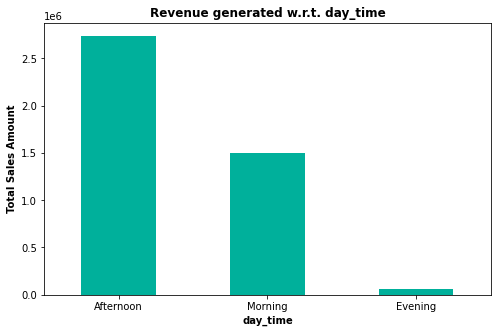

In [ ]:
time_revenue_df = df.groupby('day_time')['Sales_Amount'].sum().sort_values(ascending=False)
print(time_revenue_df)
time_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. day_time", weight ='bold')
plt.xlabel("day_time", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

* **As we can see, maximum revenue is generated from the purchases made in the afternoon.**

9. **Which countries has the most number of customers?**

In [ ]:
# Number of customers - countrywise
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country':'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,300303
1,Germany,7450
2,France,6891
3,EIRE,5444
4,Spain,2041


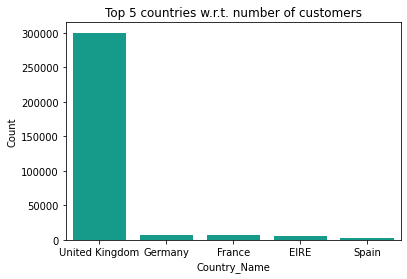

In [ ]:
# plot the top 5 countries based on the number of customers
sns.barplot(x='Country_Name', y='Count', data=country_df[:5], color = '#00b09b')
plt.title('Top 5 countries w.r.t. number of customers')
plt.show()

* **Out of total customers, lakhs of customers are from United Kingdom, whereas customers from other countries are hardly some thousands.**

10. **Which are the most spending customers?**

CustomerID
14911    84980.89
13089    36347.88
14096    36019.84
17841    32224.59
14298    24387.53
12748    20519.88
14156    18276.11
13081    17925.53
15311    17712.96
14088    15700.62
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

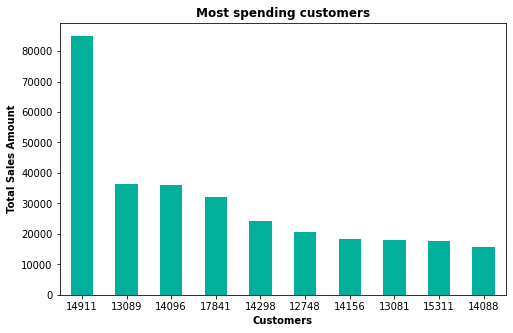

In [ ]:
cust_df = df.groupby('CustomerID')['Sales_Amount'].sum().sort_values(ascending=False)[:10]
print(cust_df)
cust_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Most spending customers", weight ='bold')
plt.xlabel("Customers", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

* **CustomerID - 14911 has spent over 80k, which is more than double the amount spent by any customer.**


11. **Distributions of Numerical features such as - Quantity, UnitPrice and Sales_Amount**

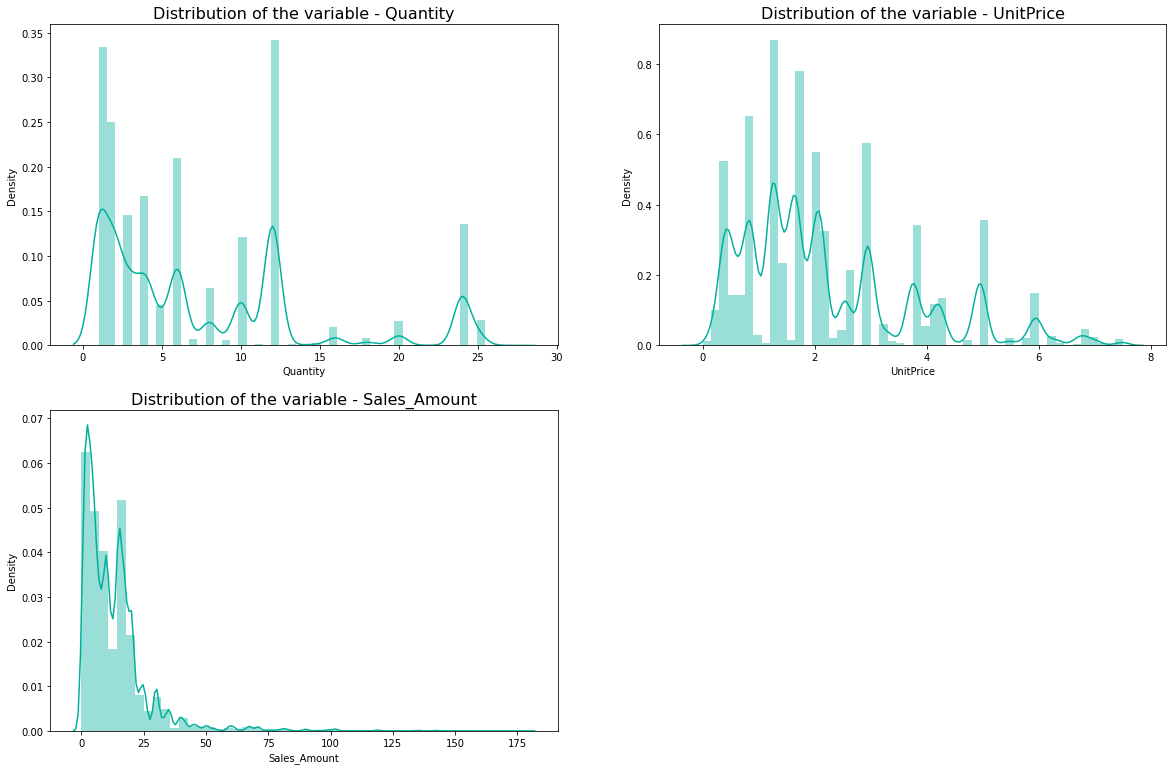

In [ ]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'Sales_Amount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature], color = '#00b09b')
  plt.title(f"Distribution of the variable - {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* **Quantity and UnitPrice are discrete numerical variables. So, from the distribution plot, we can say that unit price for most of the products ranges between 0.5 to 2.5**

* **Distribution of Sales_Amount is highly right skewed.**

**Yayy!! Finally, we are done with EDA, now we will move further to understand segmentation of customers based on different criteria.**

# **Customer Segmentation: RFM Modeling**
**We are dividing our customers on the basis of 3 factors**

**Recency:-** It represents how recently a customer purchased a product.

**Frequency:-** It represents how often a customer purchased a product. The more frequent will be the better score.

**Monetary:-** It represents how much an customer spends.

In [ ]:
monetary =df.groupby("CustomerID").Sales_Amount.sum()

# Here we are getting our monetary value by grouping customer with their customer id and total no. of sales.


monetary = monetary.reset_index().rename(columns={'Sales_Amount':'Monetary'})
# Resetting our index,our monetary has multiindex so we are removing it


monetary.head()

,CustomerID,Monetary
0,12347,3314.73
1,12348,90.20
2,12349,999.15
3,12350,294.40
4,12352,1130.94


**Now we will calculate frequency of our dataset**

In [ ]:
#calculating frequency

frequency=df.groupby("CustomerID").InvoiceNo.count()

# For calculating frequency here we are using groupby function grouping CustomerID along with the count of their invoice no. we can get our frequency


frequency = frequency.reset_index().rename(columns={'InvoiceNo':'Frequency'})
#resetting our index,our frequency has multiindex so we are removing it

frequency.head()

,CustomerID,Frequency
0,12347,166
1,12348,6
2,12349,58
3,12350,16
4,12352,66


**Now we will calculate our recency value**

In [ ]:
#calculating our recency value

#last date available in our dataset
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [ ]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,12,9)

In [ ]:
# Lets create a date column for date values only
df['Purchase_Date'] = df.InvoiceDate.dt.date

In [ ]:
recency = df.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [ ]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)

In [ ]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12347,2011-12-07,2011-12-09,2
1,12348,2011-04-05,2011-12-09,248
2,12349,2011-11-21,2011-12-09,18
3,12350,2011-02-02,2011-12-09,310
4,12352,2011-11-03,2011-12-09,36


In [ ]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

**Now we create a combined data frame**

In [ ]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [ ]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,166,3314.73
12348,248,6,90.20
12349,18,58,999.15
12350,310,16,294.40
12352,36,66,1130.94


**RFM integrity check**

Let us check whether the RFM table attributes are in conjunction with the original values

In [ ]:
# Fetch the records corresponding to the first customer id in above table
df[df.CustomerID == rfm_table.index[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_name,Day,Hour,day_time,Sales_Amount,Purchase_Date
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,12,Tuesday,7,14,Afternoon,25.20,2010-12-07
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,12,Tuesday,7,14,Afternoon,17.00,2010-12-07
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,12,Tuesday,7,14,Afternoon,39.00,2010-12-07
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,12,Tuesday,7,14,Afternoon,15.00,2010-12-07
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,12,Tuesday,7,14,Afternoon,15.00,2010-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347,Iceland,12,Wednesday,7,15,Afternoon,8.50,2011-12-07
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347,Iceland,12,Wednesday,7,15,Afternoon,23.40,2011-12-07
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347,Iceland,12,Wednesday,7,15,Afternoon,13.28,2011-12-07
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347,Iceland,12,Wednesday,7,15,Afternoon,8.40,2011-12-07


**Customer segments with RFM Model**

>The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,14.0,206.120
0.50,50.0,36.0,465.770
0.75,143.0,87.0,1126.985


In [ ]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 14.0, 0.5: 36.0, 0.75: 87.0},
 'Monetary': {0.25: 206.12, 0.5: 465.77, 0.75: 1126.9850000000001}}

**Creation of RFM Segments**

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
# Now applying these functions to get Quantiles for Recency, Frequency and Monetary
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12347,2,166,3314.73,4,4,4
12348,248,6,90.20,1,1,1
12349,18,58,999.15,3,3,3
12350,310,16,294.40,1,2,2
12352,36,66,1130.94,3,3,4


**For analysis it is critical to combine the scores to create a single score. There are few approaches. One approach is to just concatenate the scores to create a 3 digit number between 111 and 444. Here the drawback is too many categories (4x4x4).**

In [ ]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12347,2,166,3314.73,4,4,4,444
12348,248,6,90.20,1,1,1,111
12349,18,58,999.15,3,3,3,333
12350,310,16,294.40,1,2,2,122
12352,36,66,1130.94,3,3,4,334


* **Best Recency score = 4 (most recently purchase)**

* **Best Frequency score = 4 (most frequently purchase)**

* **Best Monetary score = 4 (who spent the most)**

**RFM Segment allocation**

Let us define the customers segment best to our knowledge basis RFM score and assign them to each customer respectively.

In [ ]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [ ]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [ ]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [ ]:
# Allocate segments to each customer as per the RFM score mapping
rfm_segment['Segment'] = rfm_segment.RFMScore.map(lambda x: dict_segment.get(x))

In [ ]:
# Allocate all remaining customers to others segment category
rfm_segment.Segment.fillna('others', inplace=True)

# Let us check the rfm_segment df
rfm_segment.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,12347,2,166,3314.73,4,4,4,444,Best Customers
1,12348,248,6,90.20,1,1,1,111,others
2,12349,18,58,999.15,3,3,3,333,others
3,12350,310,16,294.40,1,2,2,122,Lost Cheap Customers
4,12352,36,66,1130.94,3,3,4,334,Big Spenders


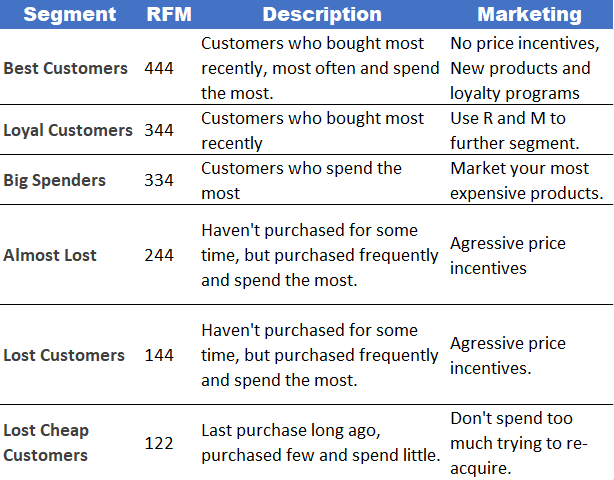

In [ ]:
# Best Customers whose recency, frequency as well as monetary attribute is highest.
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1829,14911,1,4488,84980.89,4,4,4,444,Best Customers
543,13089,4,1508,36347.88,4,4,4,444,Best Customers
1252,14096,4,4415,36019.84,4,4,4,444,Best Customers
3886,17841,1,7209,32224.59,4,4,4,444,Best Customers
1393,14298,8,1011,24387.53,4,4,4,444,Best Customers


**These are the best customers who are turned up recently, has good purchasing power and buys most frequently.**

In [ ]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2583,15981,24,84,2328.48,3,3,4,334,Big Spenders
424,12910,23,59,2297.02,3,3,4,334,Big Spenders
2102,15291,25,61,2234.16,3,3,4,334,Big Spenders
4173,18259,24,41,2203.60,3,3,4,334,Big Spenders
723,13340,45,54,2161.56,3,3,4,334,Big Spenders


**These customers are big spenders, we can market more expensive products to such customers.**

In [ ]:
# loyal customers who's purchase frequency is high
rfm_segment[rfm_segment.RFMScore=='344'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
3529,17340,29,343,8982.70,3,4,4,344,Loyal Customers
2254,15513,33,239,8215.22,3,4,4,344,Loyal Customers
154,12540,19,383,7967.64,3,4,4,344,Loyal Customers
3379,17107,33,372,7826.28,3,4,4,344,Loyal Customers
312,12731,23,173,7116.69,3,4,4,344,Loyal Customers


**These are loyal customers, who has bought not so recently, but they do buy most frequently and with high purchasing power.**

In [ ]:
# customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
3650,17509,57,364,6083.64,2,4,4,244,Almost Lost
233,12637,67,351,5056.84,2,4,4,244,Almost Lost
322,12744,56,151,4774.93,2,4,4,244,Almost Lost
3122,16745,86,296,4417.53,2,4,4,244,Almost Lost
1852,14952,59,105,4315.92,2,4,4,244,Almost Lost


**We need to do more marketing for such customers, whose recency reduced quite a lot recently. But, they are frequent and posses higher purchasing power.**

In [ ]:


#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_segment['RFMSum'] = rfm_segment[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
rfm_segment.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,RFMSum
0,12347,2,166,3314.73,4,4,4,444,Best Customers,12
1,12348,248,6,90.20,1,1,1,111,others,3
2,12349,18,58,999.15,3,3,3,333,others,9
3,12350,310,16,294.40,1,2,2,122,Lost Cheap Customers,5
4,12352,36,66,1130.94,3,3,4,334,Big Spenders,10


In [ ]:
rfm_segment.describe()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMSum
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,15290.259065,91.977576,79.500239,1025.638403,2.505725,2.488788,2.500000,7.494513
std,1719.353408,99.896494,200.419111,2199.980606,1.119006,1.117471,1.118167,2.836004
min,12347.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,13808.750000,17.000000,14.000000,206.120000,2.000000,1.000000,1.750000,5.000000
50%,15280.500000,50.000000,36.000000,465.770000,3.000000,2.000000,2.500000,7.000000
75%,16770.250000,143.000000,87.000000,1126.985000,4.000000,3.000000,3.250000,10.000000
max,18287.000000,373.000000,7209.000000,84980.890000,4.000000,4.000000,4.000000,12.000000


Here, we see RFMSum column has minimum value as 3 and maximum value as 12.

25th percentile at 5

50th percentile at 7

75th percentile at 10

Hence, we can segment customers based on percentiles of RFMSum too. Next we will be analyzing these segmentations.

In [ ]:
print(rfm_segment[rfm_segment.RFMSum > 10].shape)


(819, 10)


**These are valuable customers for the company.**

In [ ]:
rfm_segment.RFMSum.value_counts()

5     471
6     458
8     445
12    432
7     429
10    417
3     392
11    387
9     384
4     377
Name: RFMSum, dtype: int64

# **K-Means Clustering Analysis:**

---

**We will now cluster our customers with K-Means! So let's visualize the data distribution in RFM1.**

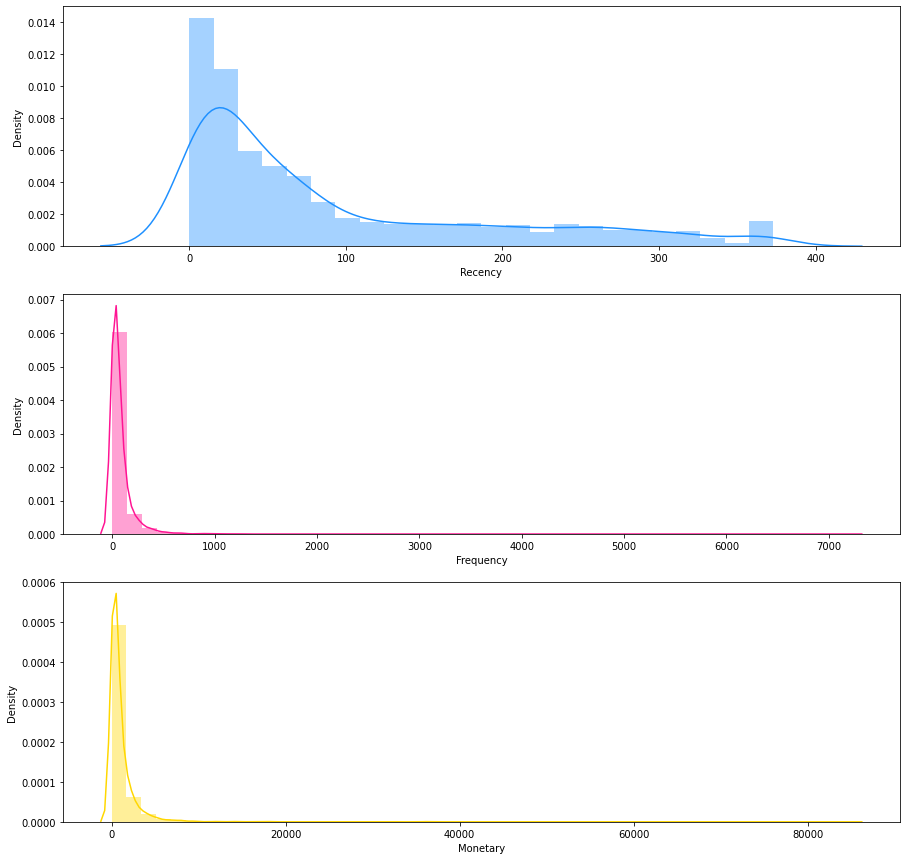

In [ ]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')

plt.show()

**Here we observe that the data is highly skewed. So we have to transform and scale the data first because K-Means assumes that the variables should have a symmetric distributions(not skewed) and they should have same average values as well as same variance.**

In [ ]:
# Let's describe the table to see if there are any negative values
rfm_table.describe()

,Recency,Frequency,Monetary
count,4192.000000,4192.000000,4192.000000
mean,91.977576,79.500239,1025.638403
std,99.896494,200.419111,2199.980606
min,0.000000,1.000000,0.000000
25%,17.000000,14.000000,206.120000
50%,50.000000,36.000000,465.770000
75%,143.000000,87.000000,1126.985000
max,373.000000,7209.000000,84980.890000


**We can observe that Monetary contains 0 values. So first we need to make sure that minimum range of value starts from 1 otherwise log transformation may lead to errors in graph plotting as well as K-Means clustering. After that we will utilize log transformation and scaling to make data available for for K-Means clustering.**

In [ ]:
# Create a copy of rfm table
rfm_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_scaled.Monetary = rfm_scaled.Monetary + abs(rfm_scaled.Monetary.min()) + 1
rfm_scaled.Recency = rfm_scaled.Recency + abs(rfm_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,4192.000000,4192.000000,4192.000000
mean,92.977576,79.500239,1026.638403
std,99.896494,200.419111,2199.980606
min,1.000000,1.000000,1.000000
25%,18.000000,14.000000,207.120000
50%,51.000000,36.000000,466.770000
75%,144.000000,87.000000,1127.985000
max,374.000000,7209.000000,84981.890000


In [ ]:
# Transform the data before K-Means clustering

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_scaled.index, columns=rfm_scaled.columns)


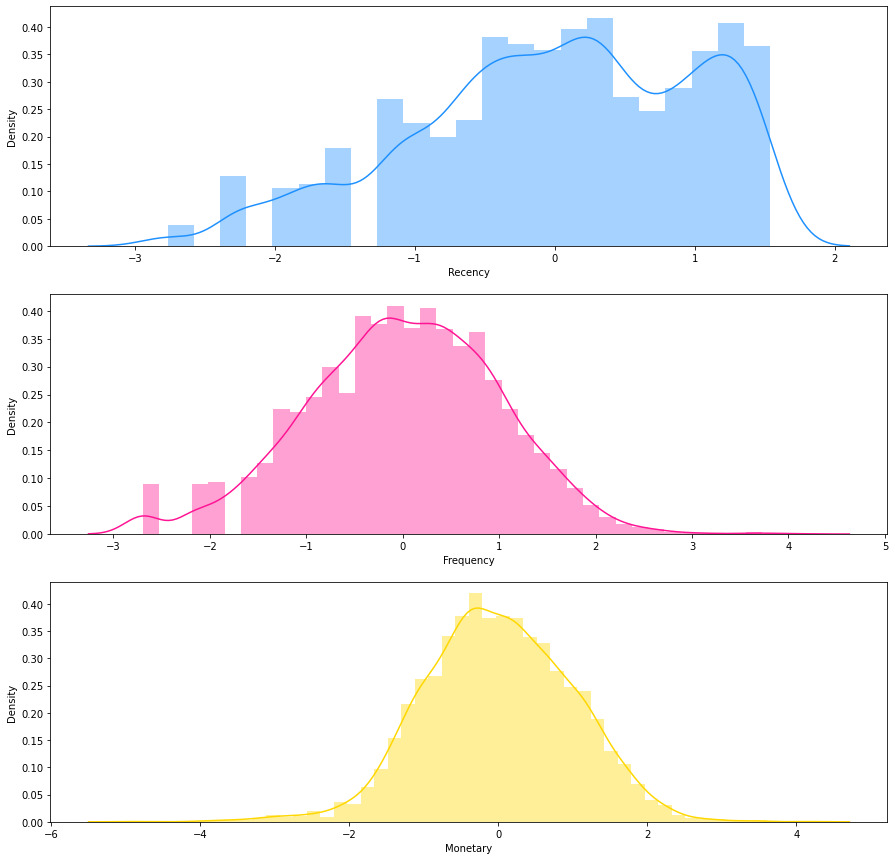

In [ ]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show()

**We can observe that the means & averages are approximately uniformed now in each distribution. Now the data is apt for unsupervised algo i.e. K-Means. Lets try to find number of appropriate clusters to divide customers as per there spending pattern with elbow method first.**

# **Finding number of clusters using Elbow Method**

---



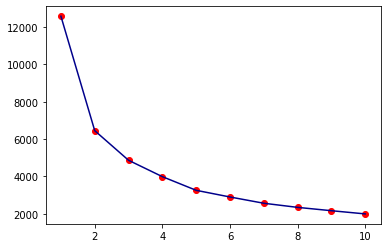

In [ ]:
# In the K-Means algorithm we are using elbow method to find the number of clustering groups.
wcss = []
for k in range(1,11):

    km = KMeans(n_clusters=k)
	
    km.fit(normal_df)
	
    wcss.append(km.inertia_)
	
plt.plot(np.arange(1,11), wcss,color="darkblue")

plt.scatter(np.arange(1,11), wcss,color="red")

plt.show()

**From the elbow graph, it seems that good number of cluster would be either 2 or 3 as after that, its a smooth curve i.e. no change of orientation. but to overcome that confusion, we will use silhouette score method to find the optimum number of clusters because it is often much better in figuring out the number of valid clusters than the elbow method.**

# **Finding number of clusters using Silhouette score Method**

---



In [ ]:
lst_silhouette = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    lst_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.402461470949038
Silhouette score for number of cluster(s) 3: 0.31061996610221265
Silhouette score for number of cluster(s) 4: 0.310054100114652
Silhouette score for number of cluster(s) 5: 0.30273958251567773
Silhouette score for number of cluster(s) 6: 0.2928168218429928
Silhouette score for number of cluster(s) 7: 0.2854394122127236
Silhouette score for number of cluster(s) 8: 0.27429795355812236
Silhouette score for number of cluster(s) 9: 0.26878310103075487
Silhouette score for number of cluster(s) 10: 0.27559351281107564


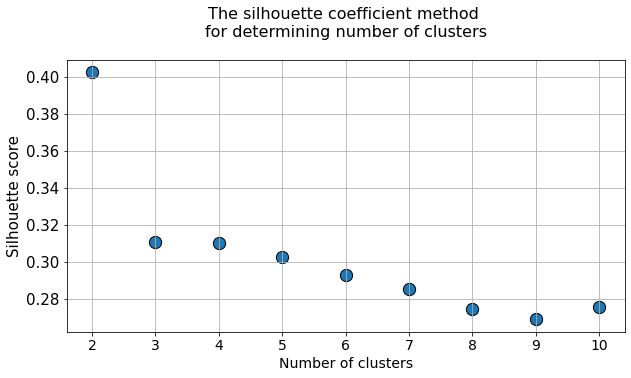

In [ ]:
plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,11)],y=lst_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

**Here we can clearly see that optimum number of cluster should be 4 not 2 or 3. Because that is the only point after which the mean cluster distance looks to be plateaued after a steep downfall. So we will assume the 4 number of clusters as best for grouping of customer segments.**

**Now let's apply K-Means on 4 clusters to segregate the customer base.**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [ ]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [ ]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RMF1 dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4192,)
Shape of RMF1 dataframe is (4192, 10)


In [ ]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)
Cluster_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,RFMSum,Cluster
0,12347,2,166,3314.73,4,4,4,444,Best Customers,12,2
1,12348,248,6,90.20,1,1,1,111,others,3,1
2,12349,18,58,999.15,3,3,3,333,others,9,0
3,12350,310,16,294.40,1,2,2,122,Lost Cheap Customers,5,1
4,12352,36,66,1130.94,3,3,4,334,Big Spenders,10,3
...,...,...,...,...,...,...,...,...,...,...,...
4187,18280,277,8,137.00,1,1,1,111,others,3,1
4188,18281,180,5,46.92,1,1,1,111,others,3,1
4189,18282,7,8,113.13,4,1,1,411,others,6,0
4190,18283,3,717,2002.63,4,4,4,444,Best Customers,12,2


In [ ]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

3    1264
1    1116
2     969
0     843
Name: Cluster, dtype: int64

**Here we see that most of the customers belong to 0 and 4 cluster, whereas very less number of customers assigned to 1 and 2 cluster, may be possible that those are some of the best customers out of the pool or worst customer, lets checkout the pattern**

**Further we will visualize the clusters**

In [ ]:
km_cluster_monetary =Cluster_table.groupby("Cluster").Monetary.mean()


km_cluster_Recency =Cluster_table.groupby("Cluster").Recency.mean()


km_cluster_Frequency =Cluster_table.groupby("Cluster").Frequency.mean()


km_cluster_monetary

Cluster
0     398.994081
1     150.329042
2    2907.523932
3     773.707494
Name: Monetary, dtype: float64

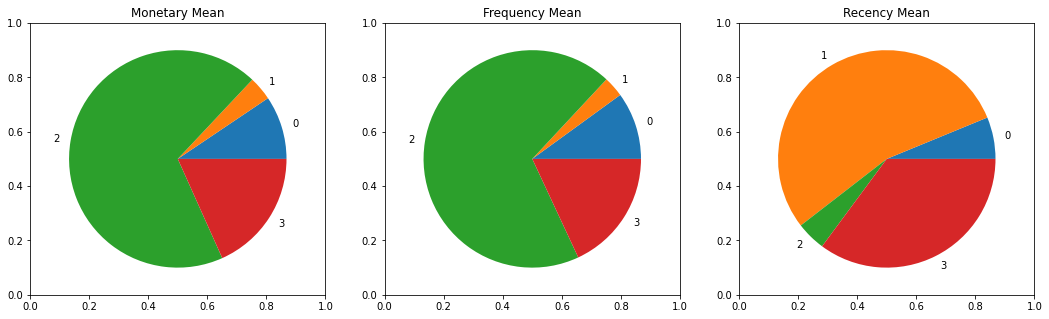

In [ ]:
#plotting pie-chart to see clusters w.r.t. RFM
fig,axis = plt.subplots(1,3, figsize =(18,5))

ax1 =fig.add_subplot(1,3,1)

plt.title("Monetary Mean")

ax1.pie(km_cluster_monetary, labels =[0,1,2,3])

ax1 =fig.add_subplot(1,3,2)

plt.title("Frequency Mean")

ax1.pie(km_cluster_Frequency, labels =[0,1,2,3])

ax1 =fig.add_subplot(1,3,3)

plt.title("Recency Mean")

ax1.pie(km_cluster_Recency, labels =[0,1,2,3])

#ax1.axis("off")

plt.show()

* **From the above pie chart we can easily understand our 4 groups according to Recency mean,Frequency mean and Monetary mean.**

* **Group 2 is the group of customers who spends maximum amount of money and also has a good frequency and very low recency rate. These are most important customers to the company with respect to revenue building.**

* **Group 0 is the group of customers whose frequency rate and monetary value are good and has low frequency rate compared to group 3 customers.**

* **Group 1 is the group of customers who has a very high recency rate means they have not purchased for a long time. Also, they have very less purchasing power and frequency is very low.**

* **Group 3 is the group of customers who has medium spending capacity and frequency but, they haven't purchased for a long time now.**

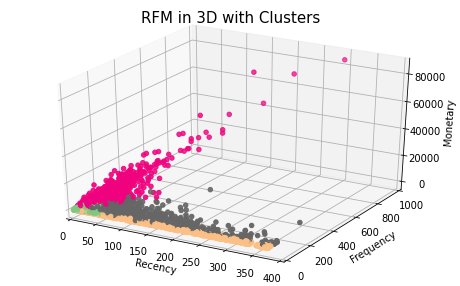

In [ ]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(Cluster_table.Recency, Cluster_table.Frequency, Cluster_table.Monetary, c=Cluster_table.Cluster, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')

# to set the y axis limits
ax.set_ylim(0, 1000)

# to set the x axis limits
ax.set_xlim(0, 400)

plt.show()

**Observations :**

1. In the above 3D graph, we put all the three variable into 3 axis and added the cluster variable to differentiate the points.

2. Skin colour points is the group of customers whose Recency is high, Frequency is low and Monetary value is also low.

3. Pink points are the group of customers whose Recency is low, Frequency is better than green points and Monetary is good.

4. Grey points are the group of customers whose Recency is high, Frequency and Monetory are better than the dark pink ones.

# **Cohort Analysis**

**Types of Cohort -**

1. **Time Cohorts** are customers who signed up for a product or service during a particular time frame. Analysing these cohorts shows the customers’ behaviour depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.

2. **Behaviour cohorts** are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design custom-made services or products for particular segments.

3. **Size cohorts** refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time

In [ ]:
# select only limited columns and copying it into new dataframe
df_cohort = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Sales_Amount']].copy()


df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**For cohort analysis, there are a few labels that we have to create:**

1. **Invoice Month:** A string representation of the year and month of a single transaction/invoice.

2. **Cohort Month:** A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.

3. **Cohort period:** A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [ ]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.strftime('%Y-%m')
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [ ]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [ ]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     333265 non-null  object        
 1   StockCode     333265 non-null  object        
 2   Description   333265 non-null  object        
 3   Quantity      333265 non-null  int64         
 4   InvoiceDate   333265 non-null  datetime64[ns]
 5   UnitPrice     333265 non-null  float64       
 6   CustomerID    333265 non-null  int64         
 7   Country       333265 non-null  object        
 8   Sales_Amount  333265 non-null  float64       
 9   InvoiceMonth  333265 non-null  datetime64[ns]
 10  CohortMonth   333265 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 30.5+ MB


In [ ]:
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [ ]:
df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_Amount,InvoiceMonth,CohortMonth,CohortPeriod
476196,576948,46000S,POLYESTER FILLER PAD 40x40cm,3,2011-11-17 11:45:00,1.45,14515,United Kingdom,4.35,2011-11-01,2011-05-01,6
21608,538097,22333,RETROSPOT PARTY BAG + STICKER SET,24,2010-12-09 14:56:00,1.65,15192,United Kingdom,39.60,2010-12-01,2010-12-01,0
404553,571681,23537,WALL ART I LOVE LONDON,6,2011-10-18 13:44:00,4.95,16734,United Kingdom,29.70,2011-10-01,2011-08-01,2
298207,562999,20727,LUNCH BAG BLACK SKULL.,10,2011-08-11 11:51:00,1.65,15117,United Kingdom,16.50,2011-08-01,2011-05-01,3
342433,566864,47503H,ASS FLORAL PRINT SPIRIT LEVEL,2,2011-09-15 12:51:00,0.79,17786,United Kingdom,1.58,2011-09-01,2011-01-01,8


In [ ]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,833.0,302.0,261.0,307.0,295.0,330.0,301.0,279.0,289.0,316.0,306.0,417.0,213.0
2011-01-01,399.0,83.0,106.0,91.0,125.0,114.0,98.0,97.0,121.0,130.0,144.0,47.0,NaN
2011-02-01,359.0,64.0,67.0,101.0,97.0,88.0,87.0,95.0,92.0,109.0,24.0,NaN,NaN
2011-03-01,442.0,64.0,110.0,87.0,100.0,74.0,112.0,103.0,121.0,38.0,NaN,NaN,NaN
2011-04-01,288.0,58.0,58.0,57.0,54.0,68.0,63.0,72.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,277.0,51.0,47.0,47.0,59.0,62.0,76.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,231.0,40.0,34.0,62.0,54.0,75.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,193.0,31.0,40.0,45.0,54.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,31.0,42.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations :**

---


1. The above table show retention and acquisition of customers.

2. Vertically i.e. the first column '0' tells how many new customers the business acquired in a particular month. ex: 833 is the number of customers business acquired in Dec'2010, 399 is the number of customers(different from previous month) business acquired in Jan'2011, and so on.

3. Horizontally i.e the first row tells the number of customers who is continuing to be part of business since their first purchase i.e. Dec'2010. ex: 302 is the number of customers out of 833 that continue to purchase one month after their first purchase, 261 is the number of customers that continue to purchase two months after their first purchase, and so on.

In [ ]:
# Retention table

cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,36.3,31.3,36.9,35.4,39.6,36.1,33.5,34.7,37.9,36.7,50.1,25.6
2011-01-01,100.0,20.8,26.6,22.8,31.3,28.6,24.6,24.3,30.3,32.6,36.1,11.8,NaN
2011-02-01,100.0,17.8,18.7,28.1,27.0,24.5,24.2,26.5,25.6,30.4,6.7,NaN,NaN
2011-03-01,100.0,14.5,24.9,19.7,22.6,16.7,25.3,23.3,27.4,8.6,NaN,NaN,NaN
2011-04-01,100.0,20.1,20.1,19.8,18.8,23.6,21.9,25.0,6.9,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.4,17.0,17.0,21.3,22.4,27.4,9.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.3,14.7,26.8,23.4,32.5,10.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.1,20.7,23.3,28.0,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,18.7,25.3,24.7,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,22.7,30.9,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations :**

1. The above table is nothing but showing value in percentages.

2. We can see that over the period of time how the customer interact with the business. ex- In Jan'2011 the business acquire some new customers but after one month only 20.8% are retained or say revisit again. Then the number rise to 26.6% which means some customers back and purchase again and the reason could be an invitation/offers is sent to those group of customers.

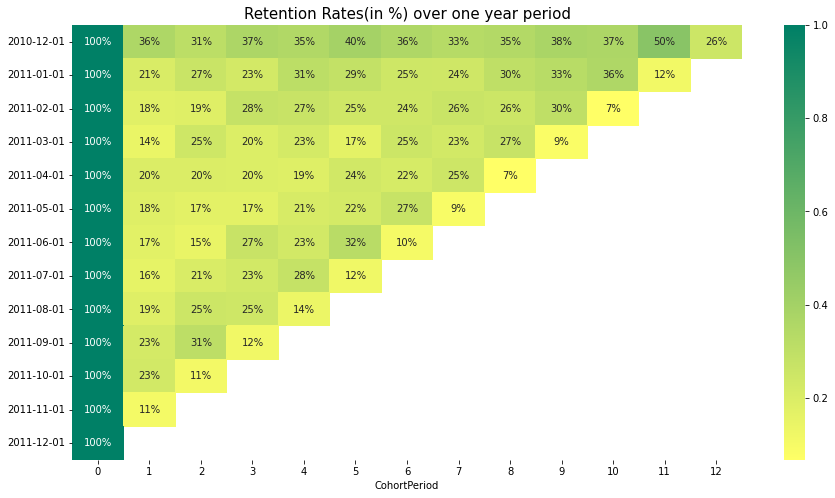

In [ ]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()

In [ ]:
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Sales_Amount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,13.11,14.26,13.25,12.59,12.59,13.24,12.67,12.42,12.59,14.10,13.80,12.49,13.5
2011-01-01,12.51,13.09,11.08,11.86,14.05,14.48,15.03,13.26,13.68,13.45,11.90,11.40,NaN
2011-02-01,13.58,12.31,12.74,14.75,14.61,13.03,15.79,17.67,13.89,16.24,15.43,NaN,NaN
2011-03-01,13.31,14.81,15.86,13.43,14.94,15.01,16.64,13.77,12.09,9.87,NaN,NaN,NaN
2011-04-01,13.23,15.56,13.25,14.96,13.60,12.39,12.97,12.79,10.90,NaN,NaN,NaN,NaN
2011-05-01,14.12,11.84,15.09,16.18,16.21,11.72,13.64,11.54,NaN,NaN,NaN,NaN,NaN
2011-06-01,12.14,9.92,14.32,13.72,11.67,11.31,10.25,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,11.51,17.61,11.63,12.63,9.18,11.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,13.30,9.35,9.80,11.27,13.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations :**

1. The above table shows the average amount spent by the group of customers over the period of time.
2. ex: For the group of customers of Jan'2011 they initially spent 12.51 but after one month they spent 13.09 higher than the previous, then they spend 11.08 after two months and so on.

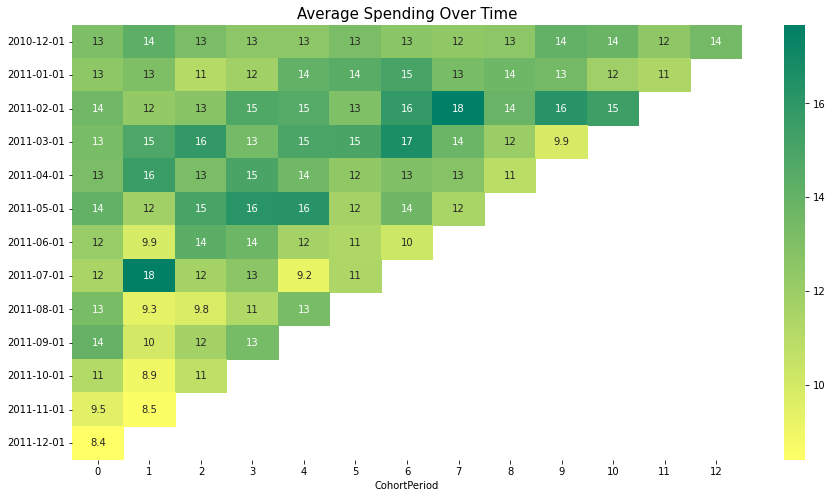

In [ ]:
#Build the heatmap or pictorial representation of above table

amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()

Finally, we are at the end of the excercise, let us make conclusions related to our analysis.

# **Conclusions**

---



* Throughout the exercise, we went through various steps to perform customer segmentation. We started with importing data and important libraries. Then, did rigorous data wrangling.

* We have performed RFM Analysis on the data, where we clustered customers based on Recency, Monetary and Frequency aspect. We used Elbow method, Silhouette score method to find appropriate number of clusters. We discovered 4 clusters based on RFM data.

* Further, did cohort analysis to understand how retention and acquisition rate, average amount spends changes over the time.

* However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations. The clustering can also be performed on new set of features such as type of products each customer prefers to buy often, finding out customer lifetime value (clv) and much more.

# **THANK YOU !**